# Simple Linear Regression & KNN

#### ~Coded by Jithin Joseph

# Simple Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
# Reading Data
data = pd.read_csv('CancerWisconsin_data.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Collecting X and Y
X = data['area_mean'].values
Y = data['perimeter_mean'].values

In [5]:
# Calculating coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)
#y=b0+b1x
# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print(b1, b0)

0.06811636174009932 47.3603703052715


2601.0


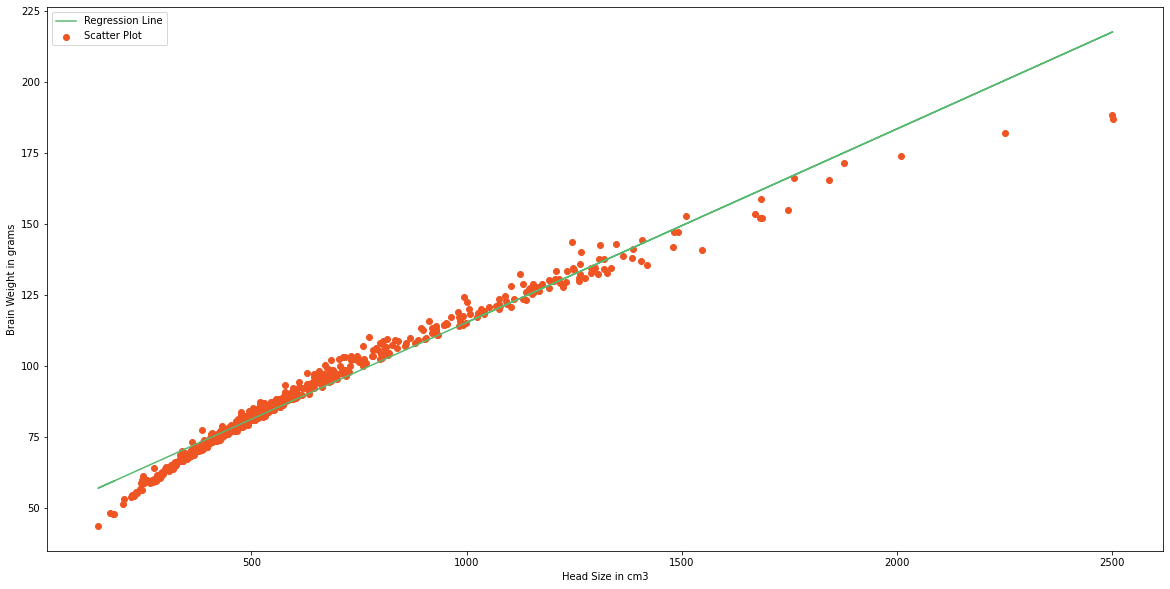

In [7]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100
print(max_x)
# Calculating line values x and y
# x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * X

# Ploting Line
plt.plot(X, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [8]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

3.974738301820247


In [9]:
# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print(r2)

0.9731956743213074


In [10]:
# Validation using Scikit Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
X = X.reshape((n, 1))
reg = LinearRegression()
reg = reg.fit(X, Y)

In [22]:
Y_pred = b0 + b1 * X
mse = mean_squared_error(Y, Y_pred)
r2_score = reg.score(X, Y)

In [23]:
print(np.sqrt(mse))
print(r2_score)

3.974738301820246
0.9731956743213074


In [26]:
# regression coefficients 
print('Coefficients: \n', reg.coef_) 

Coefficients: 
 [0.06811636]


In [28]:
# regression coefficients 
print('Coefficients: \n', reg.intercept_) 

Coefficients: 
 47.36037030527152


In [30]:
x = np.array([4512,3500]).reshape([-1,1])
yy=reg.predict(x)
print(yy)

[354.70139448 285.7676364 ]


# KNN

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('diabetes_dataset.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from sklearn.model_selection import train_test_split  
arr=data.values
X=arr[:,0:8]
Y=arr[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)  
print( X_test)

[[3.00e+00 1.16e+02 7.40e+01 ... 2.63e+01 1.07e-01 2.40e+01]
 [1.00e+00 1.81e+02 6.40e+01 ... 3.41e+01 3.28e-01 3.80e+01]
 [0.00e+00 1.05e+02 9.00e+01 ... 2.96e+01 1.97e-01 4.60e+01]
 ...
 [7.00e+00 1.52e+02 8.80e+01 ... 5.00e+01 3.37e-01 3.60e+01]
 [2.00e+00 1.46e+02 7.00e+01 ... 2.80e+01 3.37e-01 2.90e+01]
 [2.00e+00 9.80e+01 6.00e+01 ... 3.47e+01 1.98e-01 2.20e+01]]


## What is the significance of random_state parameter in train_test_split?

### random_state parameter helps us to select some values that can be fixed for running the test again. without the parameter , each time we run the train_test_split(), different values will be selected.

In [6]:
from sklearn import preprocessing as p
scaler=p.StandardScaler().fit(X_train)

## Is it required to execute the following code for X_test too? 
### when a normalization is done on training data set, then we have to do the same for test data set too. otherwise,the accuracy might end up zero when testing.

In [22]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=50)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

### The total number of correct predictions = true positive + true negative
### hence correct predictions = 95 + 24 = 119

## interpretations wrt the classification report.

### precision =  TP / (TP+FP) 
### recall = TP / (TP+FN)
### f1-score = harmonic mean of precision and recall

In [23]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[95 11]
 [24 24]]
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.84       106
         1.0       0.69      0.50      0.58        48

    accuracy                           0.77       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154



## for different values of k in kNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=70)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[97  9]
 [23 25]]
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       106
         1.0       0.74      0.52      0.61        48

    accuracy                           0.79       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.79      0.79      0.78       154



In [29]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=65)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[98  8]
 [24 24]]
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86       106
         1.0       0.75      0.50      0.60        48

    accuracy                           0.79       154
   macro avg       0.78      0.71      0.73       154
weighted avg       0.79      0.79      0.78       154

